# An Analysis of Political Contributions During the 2020 House of Representatives Election
Name: Habeeb Kotun Jr.<br>
Date: October 2021<br>

Goal of this project is to:
1. Webscrape data for the 2020 House of Representatives ELection from the Open Secrets website.
2. Investigate different relationships between candidates and the amount of money they raised and spent.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm 
import numpy as np

In [2]:
# Read in cleaned US dataframe
US = pd.read_csv('../data/us_rep_elections.csv')

In [3]:
# Create new column for raised - spent called 'remaining_money'
US['remaining_money'] = US['raised'] - US['spent']

In [4]:
# Print information and first ten rows of US dataframe
print(US.info())
print("------------------------------------------------------------------------------------------")
print(US.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             894 non-null    object
 1   raised           894 non-null    int64 
 2   spent            894 non-null    int64 
 3   state            894 non-null    object
 4   district         894 non-null    int64 
 5   party            894 non-null    object
 6   incumbent        894 non-null    bool  
 7   winner           894 non-null    bool  
 8   remaining_money  894 non-null    int64 
dtypes: bool(2), int64(4), object(3)
memory usage: 50.8+ KB
None
------------------------------------------------------------------------------------------
                  name   raised    spent state  district party  incumbent  \
0          Jerry Carl   1971321  1859349    AL         1     R      False   
1       James Averhart    80095    78973    AL         1     D      False   
2         Barr

In [5]:
# Build a Logistic regression model with target variable equal to if a candidate won the race or not, 
# predictor variable will be the difference between money raised and money spent
losreg = (sm.GLM(endog = US['winner'],
                 exog = sm.add_constant(US['remaining_money']),
                 family = sm.families.Binomial()).fit())

print(losreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -551.58
Date:                Tue, 19 Oct 2021   Deviance:                       1103.2
Time:                        21:23:27   Pearson chi2:                 1.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4266      0.078     

C:\Users\hjrko\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


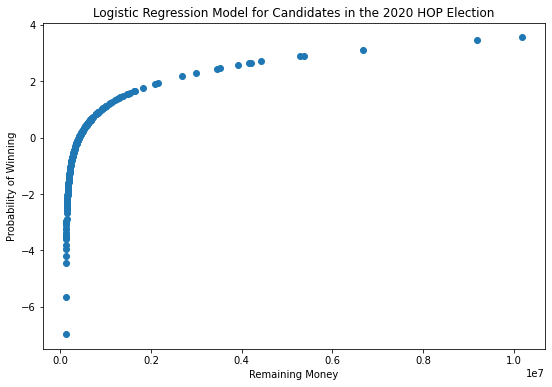

In [6]:
# Plot Logistic regression model results from previous cell
fig, ax = plt.subplots(figsize=(9,6))
x = US['remaining_money']
y_logistic = np.log(losreg.params[0] + (losreg.params[1]*x))
plt.scatter(x, y_logistic)
plt.xlabel("Remaining Money")
plt.ylabel("Probability of Winning")
plt.title("Logistic Regression Model for Candidates in the 2020 HOP Election");

In [7]:
# Group dataset by Incumbent status and if if they won the race or not
incumbent_winners = US.groupby(['incumbent', 'winner']).size().unstack().iloc[::-1, ::-1]
incumbent_winners.iloc[0] = incumbent_winners.iloc[0]/incumbent_winners.iloc[0].sum()
incumbent_winners.iloc[1] = incumbent_winners.iloc[1]/incumbent_winners.iloc[1].sum()

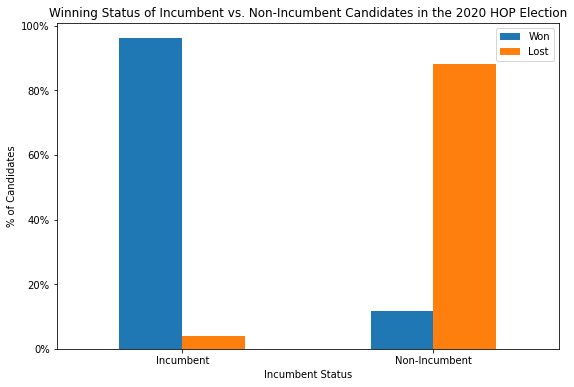

In [8]:
# Investigate how often the incumbent candidate wins a race
fig, ax = plt.subplots(figsize=(9,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
incumbent_winners.plot(kind='bar',
                       rot=0,
                       ax=ax)
plt.title('Winning Status of Incumbent vs. Non-Incumbent Candidates in the 2020 HOP Election')
plt.xlabel('Incumbent Status')
plt.ylabel('% of Candidates')
plt.xticks([0,1], ['Incumbent', 'Non-Incumbent'])
plt.legend(['Won', 'Lost'], loc=1);

The above bar graph shows that incumbent candidates are highly likely to be re-elected.<br>
96% of incumbents from the 2020 House of Representatives election won their relection.<br>